# 2.4 Three Particles Kinematics
In this exercise we study kinematics for the decay to three particles.
We will plot available phase space using subchannel variables representations.
The exercise from the script reads:
<img src="pict/Exercise-2.4.1.png" alt="Exercise text" style="width: 650px;"/>

The interactive matherial in this notebook has a part of the exercise solution.
Read carefully the comments, try to understand the equations. The code is just the translation of them to machine commands using  the `julia`-language.

## Define the range function
The expression of the limits of $\sigma_3$-variable (answer to the fourth bullet):
$$
\sigma_1^{\pm} = s+m_1^2-\frac{(\sigma_3+m_1^2-m_2^2)(s+\sigma_3-m_3^2)}{2s} \mp \frac{\lambda^{1/2}(\sigma_3,m_1^2,m_2^2)\lambda^{1/2}(s,\sigma_3,m_3^2)}{2s}
$$

Code it as a fuction `σ1_lims(σ3,s,m1sq,m2sq,m3sq)` which returns two numbers for the upper and the lower limit.

In [1]:
λ(x,y,z) =  x^2+y^2+z^2-2*x*y-2*y*z-2*z*x
function σ1_lims(σ3,s,m1sq,m2sq,m3sq)
    λλ = λ(σ3,m1sq,m2sq)λ(s,σ3,m3sq)
    λλ < 0 && error("unphysical input to the range function: λλ = $λλ")
    s+m1sq-(σ3+m1sq-m2sq)*(s+σ3-m3sq)/(2σ3)-sqrt(λλ)/(2σ3) * [1,-1]
end

σ1_lims (generic function with 1 method)

Then the available kinematical range for the certain $s$ is given by
$$
\begin{align}
(m_1+m_2)^2\le &\,\sigma_3 \le (\sqrt{s}-m_3)^2\\
\sigma_1^{+}(\sigma_3,s) \le & \,\sigma_1 \le \sigma_1^{-}(\sigma_3,s)
\end{align}
$$

In [2]:
using Plots ## takes a little while, the julia compiles the code when executed for the first time

## Identical particles
The following three plots present kinematics for the reaction
$$
X \to 3\pi
$$
where $X$ can be one of the resoances in PDF: $a_1(1260)$, $a_2(1320)$, $\pi_2(1670)$ or heavy meson decaying via the weak current
$$
D\to 3\pi\quad\text{or}\quad J/\psi\to 3\pi\quad\text{or}\quad B\to 3\pi\text{ or }
$$

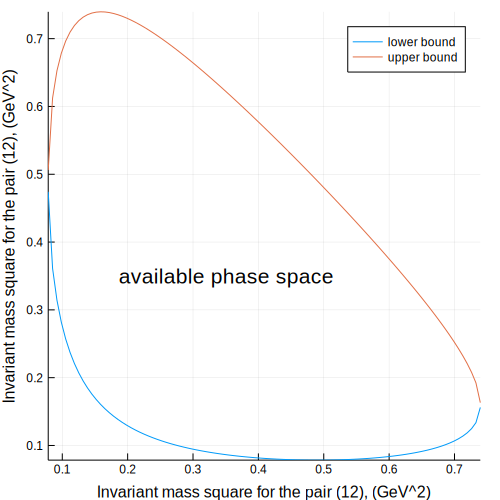

In [3]:
let s = 1.0^2
    mπ=0.14; mπ2=mπ^2
    σ3 = linspace(4mπ2+1e-4,(√s-mπ)^2-1e-4,100) # 100 points in the given interval
    cal = hcat([σ1_lims(σ,s,mπ2,mπ2,mπ2) for σ in σ3]...) # hcat is to turm array of arrays to matrix
    plot(xlab="Invariant mass square for the pair (12), (GeV^2)",
        ylab="Invariant mass square for the pair (12), (GeV^2)", size=(500,500))
    plot!(σ3, cal[1,:], lab="lower bound") # first row of the `cal`-matrix
    plot!(σ3, cal[2,:], lab="upper bound") # second row of the `cal`-matrix
    annotate!([(0.35,0.35,"available phase space")]) # add the text in the middle
#     plot!(σ3, cal[1,:], fillrange=cal[2,:], lab="s = $s GeV^2")
end

### Check how the size of the plot chages
Changing the value of the total invariant mass square $s$, you can observe that size of the Datitz plot changes. It indicates that as high the energy of the system as bigger the available phase space for the produced particles. 

In [4]:
using Interact # to have movable toggle

Interact.Options{:SelectionSlider,Float64}(1: "input" = 1.25 Float64 , "sqrt_s", 1.25, "1.25", 5, Interact.OptionDict(DataStructures.OrderedDict("0.5"=>0.5,"0.6875"=>0.6875,"0.875"=>0.875,"1.0625"=>1.0625,"1.25"=>1.25,"1.4375"=>1.4375,"1.625"=>1.625,"1.8125"=>1.8125,"2.0"=>2.0), Dict(1.0625=>"1.0625",0.5=>"0.5",1.625=>"1.625",2.0=>"2.0",1.25=>"1.25",1.4375=>"1.4375",1.8125=>"1.8125",0.875=>"0.875",0.6875=>"0.6875")), Any[], Any[], true, "horizontal", true)

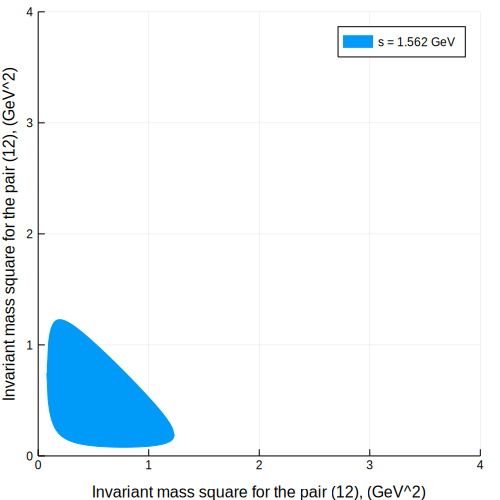

In [5]:
@manipulate for sqrt_s in linspace(0.5,2.0,9)
    s = sqrt_s^2
    mπ=0.14; mπ2=mπ^2
    σ3 = linspace(4mπ2+1e-4,(√s-mπ)^2-1e-4,100)
    cal = hcat(σ1_lims.(σ3,s,mπ2,mπ2,mπ2)...)
    plot(xlab="Invariant mass square for the pair (12), (GeV^2)",
        ylab="Invariant mass square for the pair (12), (GeV^2)",
        size=(500,500), xlim=(0,4), ylim=(0,4))
    plot!(σ3, cal[1,:], fillrange=cal[2,:], lab="s = $(round(s,3)) GeV")
end

### Check how the shape changes
In this plot we do not fix the ranges of the plot,
i.e. the $x$-axis and the $y$-axis will always rescale when the value of the $s$ is changed.

Interact.Options{:SelectionSlider,Float64}(5: "input-2" = 2.25 Float64 , "sqrt_s", 2.25, "2.25", 5, Interact.OptionDict(DataStructures.OrderedDict("0.5"=>0.5,"0.9375"=>0.9375,"1.375"=>1.375,"1.8125"=>1.8125,"2.25"=>2.25,"2.6875"=>2.6875,"3.125"=>3.125,"3.5625"=>3.5625,"4.0"=>4.0), Dict(3.5625=>"3.5625",4.0=>"4.0",2.25=>"2.25",3.125=>"3.125",0.5=>"0.5",0.9375=>"0.9375",1.375=>"1.375",1.8125=>"1.8125",2.6875=>"2.6875")), Any[], Any[], true, "horizontal", true)

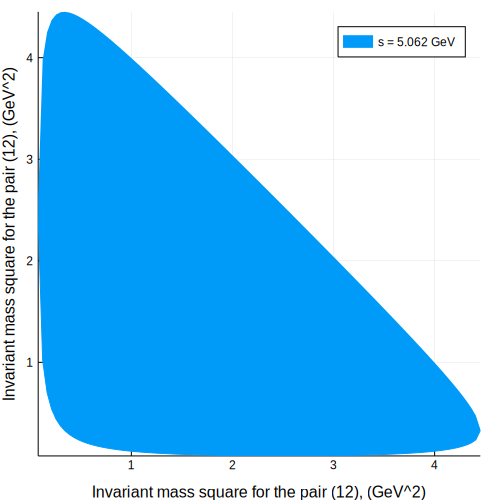

In [6]:
@manipulate for sqrt_s in linspace(0.5,4.0,9)
    s = sqrt_s^2
    mπ=0.14; mπ2=mπ^2
    σ3 = linspace(4mπ2+1e-4,(√s-mπ)^2-1e-4,100)
    cal = hcat(σ1_lims.(σ3,s,mπ2,mπ2,mπ2)...)
    plot(xlab="Invariant mass square for the pair (12), (GeV^2)",
        ylab="Invariant mass square for the pair (12), (GeV^2)", size=(500,500))
    plot!(σ3, cal[1,:], fillrange=cal[2,:], lab="s = $(round(s,3)) GeV")
end

## Various masses
At this example we look at the Dalitz plot for the decay
$$
\Lambda^0 \to K^-p\,J/\psi
$$
studied by the LHCb collaboration. The only changes in the program to be done is to adjust masses of the paricles.

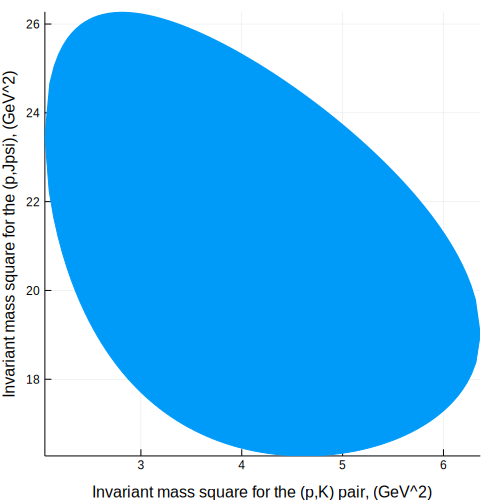

In [7]:
let mΛb=5.619; mp=0.938; mK=0.493; mJpsi=3.096;
    # masses 
    s = mΛb^2; m1 = mK; m2 = mp; m3 = mJpsi
    # σ1 and σ3 limits
    σ3 = linspace((m1+m2)^2+1e-4,(√s-m3)^2-1e-4,100)
    cal = hcat(σ1_lims.(σ3,s,m1^2,m2^2,m3^2)...)
    plot(xlab="Invariant mass square for the (p,K) pair, (GeV^2)",
        ylab="Invariant mass square for the (p,Jpsi), (GeV^2)", size=(500,500))
    plot!(σ3, cal[1,:], fillrange=cal[2,:], lab="")
end

## The final exercise:
When you digest the matherial given in the tutorial it will not be difficult to calculate what are masses of the three particles in the final state for the decay of $D_s$-meson presented by the Dalitz plot below:
$$
D_s \to X_1\,X_2\,X_3
$$
The plot is taken from a publication of the BaBar experiment
<img src="pict/the_first_dalitz_plot_nolabels.png" alt="Drawing" style="width: 600px;"/>

_Play around_: Copy the code from the previous cell to the empty cell below. Think, what the border of the Dalitz plot is determined by. When you find the right values for the masses of $X_i$-particles, the same of your plot will coincide with the one on the picture.